In [ ]:
#Importando as bibliotecas utilizadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sf

In [ ]:
BAND-PASS WINDOWED-SINC FILTER

In [ ]:
#Declarando as variaveis
#Iniciando as listas com todas as posições = 0

In [3]:
#Iniciando as listas com todas as posições = 0
A = np.zeros(800)
B = np.zeros(800)
H = np.zeros(800)

Fs = 8000 #Frequencia
FC = 0.196
tam = 800 #Tamanho do filtro

In [ ]:
#Gera os coeficientes para a lista A[]

In [140]:
for i in range(len(A)):
    if(i-(tam/2) == 0):
        A[i] = 2* np.pi * FC
    if(i - tam/2) != 0:
        A[i] = np.sin(2 * np.pi * FC * (i-tam/2)) / (i - tam/2)
    A[i] = A[i] * (0.42-0.5)*np.cos(2*np.pi*(i/tam)) + 0.08*(np.cos(4 * np.pi*(i/tam)))

In [ ]:
# Em primeiro momento realiza a soma de todos os coeficientes
# Após isso ele divide os valores de A pelo valor da soma total e salva em uma lista H

In [141]:
SUM = 0
#Soma todos os coeficientes
for i in range(len(A)):
    SUM = SUM + A[i] 

#Divide os coefiecientes pela soma de todos eles
for i in range(len(H)):
    H[i] = A[i] / SUM

In [ ]:
#Gera os coeficientes para a lista B[]
#Os calculos são realizados com uma frequencia de corte diferente da que foi utilizada para a lista A[]

In [142]:
FC = 0.204
for i in range(len(B)):
    if(i-(tam/2) == 0):
        B[i] = 2* np.pi * FC
    if(i - tam/2) != 0:
        B[i] = np.sin(2 * np.pi * FC * (i-tam/2)) / (i - tam/2)
    B[i] = B[i] * (0.42-0.5)*np.cos(2*np.pi*(i/tam)) + 0.08*(np.cos(4 * np.pi*(i/tam)))

In [ ]:
# Em primeiro momento realiza a soma de todos os coeficientes
# Após isso ele divide os valores de B pelo valor da soma total e salva em uma lista H

In [143]:
SUM = 0
#Soma todos os coeficientes
for i in range(len(B)):
    SUM = SUM + B[i] 

#Divide os coefiecientes pela soma de todos eles
for i in range(len(B)):
    B[i] = B[i] / SUM
    
for i in range(len(B)):
    B[i] = -B[i]
    
B[400] = B[400] + 1

for i in range(len(H)):
    H[i] = A[i] + B[i]

for i in range(len(H)):
    H[i] = -H[i]
    
H[400] = H[400] + 1


In [ ]:
#Plota o grafico com os valores de H

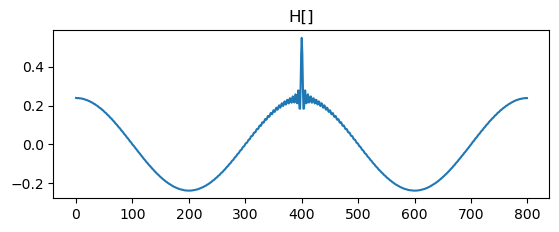

In [144]:
#Plotando o gráfico
plt.subplot(2, 1, 1)
plt.title("H[]")
plt.plot(H)

In [ ]:
#Utiliza a função freqz para calcular a resposta em frequencia
#Plota o grafico da resposta em frequencia

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

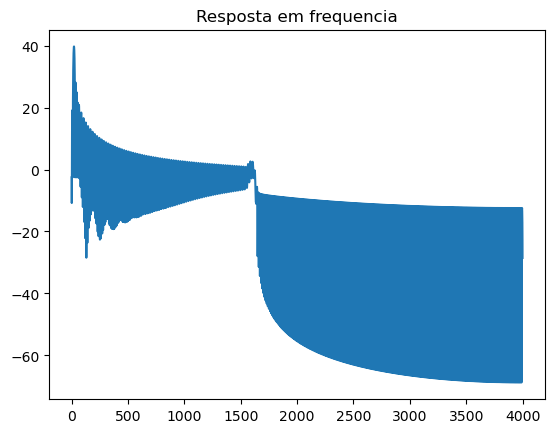

In [145]:
[w, H] = sf.freqz(H, 1,Fs)
plt.plot(w*Fs/(2*np.pi), 20*np.log10(abs(H)))
plt.title('Resposta em frequencia')
plt.grid